**1. Correlation between Music types and RT**

ANOVA F-statistic: 0.59, p-value: 0.5538


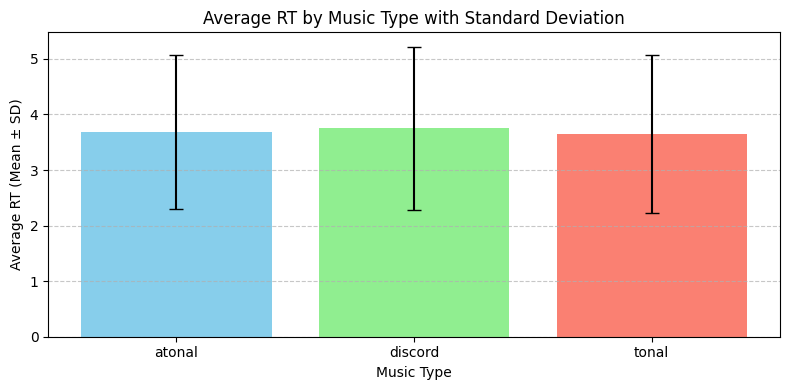

'Music type does not have a significant effect on reaction time (RT).'

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway

def analyze_rt_by_music_type(combined_data_file):
    """
    Analyzes reaction time (RT) differences between music types and performs ANOVA.
    
    Parameters:
        combined_data_file (str): Path to the Excel file containing the data.
        
    Returns:
        str: Conclusion based on the ANOVA test result.
    """
    # Read the Excel file
    data = pd.read_excel(combined_data_file)

    # Ensure the required columns are present
    required_columns = ["participant_id", "music_type", "RT"]
    if not all(col in data.columns for col in required_columns):
        raise ValueError(f"The input file must contain the following columns: {required_columns}")

    # Perform ANOVA to check for significant differences between music types
    tonal = data[data["music_type"] == "tonal"]["RT"]
    atonal = data[data["music_type"] == "atonal"]["RT"]
    discord = data[data["music_type"] == "discord"]["RT"]

    f_stat, p_value = f_oneway(tonal, atonal, discord)
    print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

    # Interpret the results
    if p_value < 0.05:
        conclusion = "Music type has a significant effect on reaction time (RT)."
    else:
        conclusion = "Music type does not have a significant effect on reaction time (RT)."

    # Calculate mean and standard deviation of RT for each music type
    summary_stats = data.groupby("music_type")["RT"].agg(["mean", "std"]).reset_index()

    # Plot the bar chart with error bars
    plt.figure(figsize=(8, 4))
    plt.bar(
        summary_stats["music_type"], 
        summary_stats["mean"], 
        yerr=summary_stats["std"], 
        capsize=5, 
        color=["skyblue", "lightgreen", "salmon"]
    )

    # Add labels, title, and grid
    plt.xlabel("Music Type")
    plt.ylabel("Average RT (Mean ± SD)")
    plt.title("Average RT by Music Type with Standard Deviation")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

    return conclusion

# Example usage:
combined_data_file = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Final_project\data\combined_data_trial.xlsx"
analyze_rt_by_music_type(combined_data_file)



**2. Correlation between music type and Introspective sensitivity**

Correlation between music type and Introspective sensitivity (IS): 0.002
The correlation between music type and IS is very weak or nonexistent.
ANOVA p-value: 9.978e-01
The ANOVA test indicates that music type does not have a significant effect on IS.


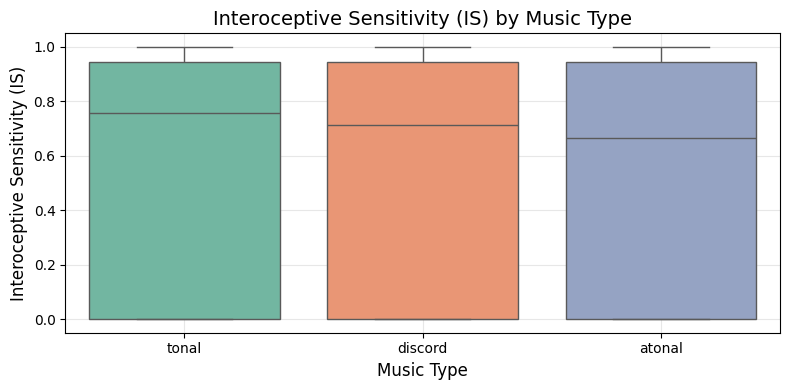

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

def analyze_music_type_vs_IS(combined_data_file: str):
    """
    Analyze the relationship between 'music_type' and 'IS' using correlation, ANOVA, and visualization.

    Parameters:
        combined_data_file (str): Path to the combined data file.

    Returns:
        None
    """
    # Reading the file
    df = pd.read_excel(combined_data_file)

    # Ensure required columns exist
    required_columns = ['music_type', 'IS']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' is missing in the input data.")

    # Drop rows with missing IS values
    df = df.dropna(subset=['IS'])

    # 1. Correlation between 'music_type' and 'IS'
    df['music_type_numeric'] = df['music_type'].astype('category').cat.codes  # Convert music_type to numeric
    correlation = df['music_type_numeric'].corr(df['IS'])
    print(f"Correlation between music type and Introspective sensitivity (IS): {correlation:.3f}")

    # Interpret correlation result
    if abs(correlation) < 0.1:
        print("The correlation between music type and IS is very weak or nonexistent.")
    elif abs(correlation) < 0.3:
        print("There is a weak correlation between music type and IS.")
    elif abs(correlation) < 0.5:
        print("There is a moderate correlation between music type and IS.")
    else:
        print("There is a strong correlation between music type and IS.")

    # 2. ANOVA test for 'music_type' and 'IS'
    model = ols('IS ~ C(music_type)', data=df).fit()  # Fit the model
    p_value = sm.stats.anova_lm(model, typ=2)['PR(>F)'].iloc[0]  # Get the p-value

    # Interpret ANOVA result
    print(f"ANOVA p-value: {p_value:.3e}")
    if p_value < 0.05:
        print("The ANOVA test indicates that music type has a significant effect on IS.")
    else:
        print("The ANOVA test indicates that music type does not have a significant effect on IS.")

    # 3. Graph of IS vs music_type
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='music_type', y='IS', data=df, hue='music_type', palette="Set2", dodge=False, legend=False)
    plt.title('Interoceptive Sensitivity (IS) by Music Type', fontsize=14)
    plt.xlabel('Music Type', fontsize=12)
    plt.ylabel('Interoceptive Sensitivity (IS)', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example usage
combined_data_file = (
    r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Final_project\data\combined_data_trial.xlsx"
)
analyze_music_type_vs_IS(combined_data_file)


**4. Valence rating by music type**

ANOVA Test Results: F-statistic = 141.05, p-value = 9.633e-57
There is a significant effect of music type on valence rating.


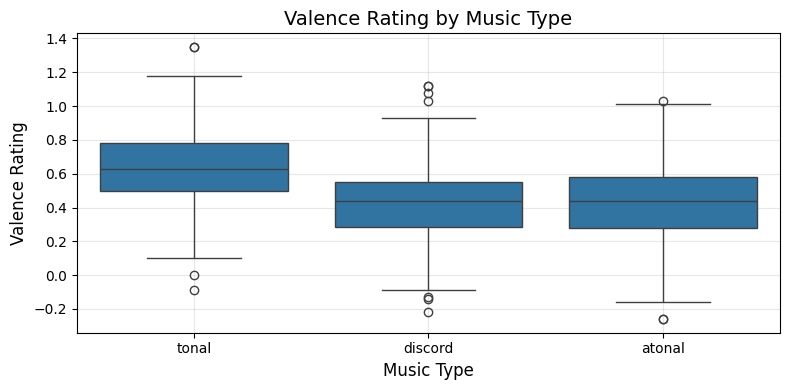

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_valence_by_music_type(combined_data_file):
    from scipy.stats import f_oneway
    """
    Plots the distribution of valence rating by music type.

    Args:
        combined_data_file (str): Path to the combined data file.
    """
    data = pd.read_excel(combined_data_file)

    plt.figure(figsize=(8, 4))
    sns.boxplot(x="music_type", y="valence_rating", data=data)
    
    # ANOVA test to check if music type affects valence rating
    tonal = data[data['music_type'] == 'tonal']['valence_rating']
    atonal = data[data['music_type'] == 'atonal']['valence_rating']
    discord = data[data['music_type'] == 'discord']['valence_rating']
    f_stat, p_value = f_oneway(tonal, atonal, discord)
    
    print(f"ANOVA Test Results: F-statistic = {f_stat:.2f}, p-value = {p_value:.3e}")
    if p_value < 0.05:
        print("There is a significant effect of music type on valence rating.")
    else:
        print("No significant effect of music type on valence rating.")
    plt.title("Valence Rating by Music Type", fontsize=14)
    plt.xlabel("Music Type", fontsize=12)
    plt.ylabel("Valence Rating", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

combined_data_file = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Final_project\data\combined_data_trial.xlsx"
plot_valence_by_music_type(combined_data_file)

**5. Heartbeat by Music type**

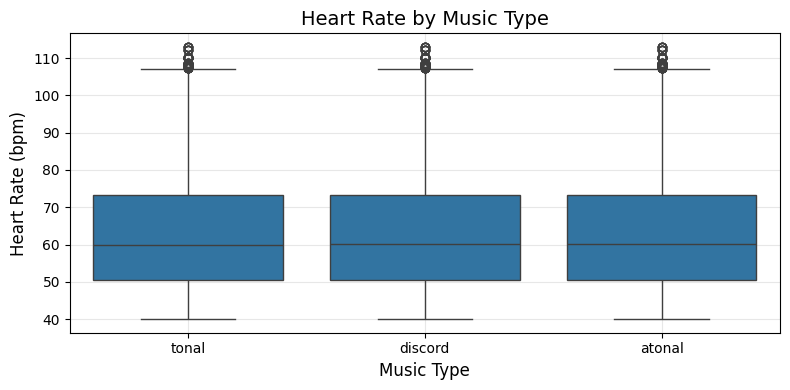

ANOVA Test Results: F-statistic = 0.00, p-value = 9.979e-01
No significant effect of music type on heart rate.


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import f_oneway

def plot_hr_by_music_type(r_peaks_file, combined_data_file):
    """
    Plots the distribution of heart rate (HR) by music type and performs ANOVA.

    Args:
        r_peaks_file (str): Path to the R-peaks file.
        combined_data_file (str): Path to the combined data file.
    """
    # Load data
    hr_data = pd.read_excel(r_peaks_file)
    combined_data = pd.read_excel(combined_data_file)

    # Merge HR data with music type
    merged_data = hr_data.merge(
        combined_data,
        how="inner",
        left_on=["participant_id", "session_id"],
        right_on=["participant_id", "session"]
    )

    # Plotting HR by music type
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="music_type", y="HR", data=merged_data)
    plt.title("Heart Rate by Music Type", fontsize=14)
    plt.xlabel("Music Type", fontsize=12)
    plt.ylabel("Heart Rate (bpm)", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # ANOVA test for HR by music type
    tonal = merged_data[merged_data['music_type'] == 'tonal']['HR']
    atonal = merged_data[merged_data['music_type'] == 'atonal']['HR']
    discord = merged_data[merged_data['music_type'] == 'discord']['HR']
    f_stat, p_value = f_oneway(tonal, atonal, discord)

    # Print ANOVA results
    print(f"ANOVA Test Results: F-statistic = {f_stat:.2f}, p-value = {p_value:.3e}")
    if p_value < 0.05:
        print("There is a significant effect of music type on heart rate.")
    else:
        print("No significant effect of music type on heart rate.")

# Example usage
combined_data_file = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Final_project\data\combined_data_trial.xlsx"
r_peaks_file = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Final_project\data\R-peaks_and_HR.xlsx"
plot_hr_by_music_type(r_peaks_file, combined_data_file)


5. Correlation between Average valence sxore and IS

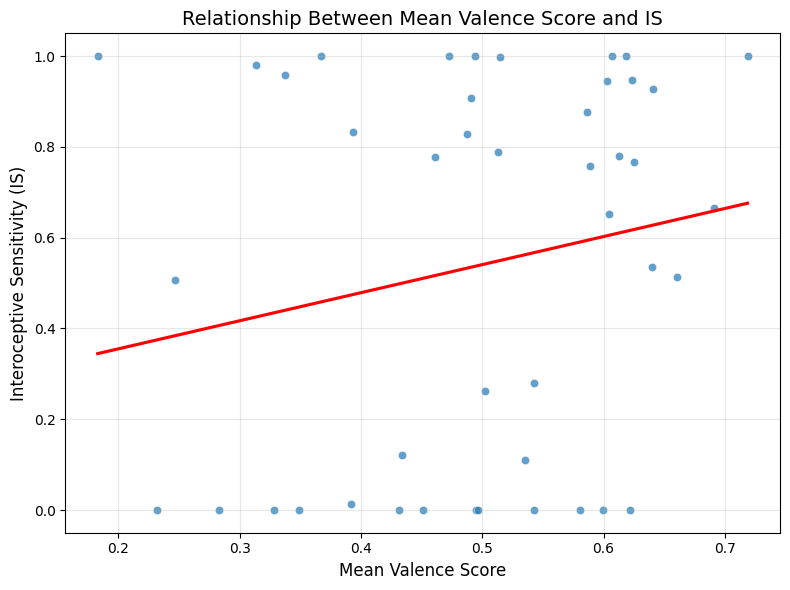

Pearson Correlation: r = nan, p-value = nan
There is no significant correlation between mean valence score and IS.


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def analyze_valence_vs_IS(combined_data_file: str):
    """
    Analyzes and visualizes the relationship between the average valence score and IS for each participant.

    Parameters:
        combined_data_file (str): Path to the combined data file containing valence scores and IS.

    Returns:
        None
    """
    # Load data
    df = pd.read_excel(combined_data_file)

    # Ensure required columns exist
    required_columns = ['participant_id', 'valence_rating', 'IS']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' is missing in the input data.")

    # Calculate mean valence rating per participant
    grouped_data = df.groupby('participant_id').agg(
        mean_valence=('valence_rating', 'mean'),
        IS=('IS', 'first')  # Assuming IS is the same for each participant
    ).reset_index()

    # Scatter plot with regression line
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='mean_valence', y='IS', data=grouped_data, alpha=0.7)
    sns.regplot(x='mean_valence', y='IS', data=grouped_data, scatter=False, color='red', ci=None)
    plt.title('Relationship Between Mean Valence Score and IS', fontsize=14)
    plt.xlabel('Mean Valence Score', fontsize=12)
    plt.ylabel('Interoceptive Sensitivity (IS)', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Pearson correlation
    correlation, p_value = pearsonr(grouped_data['mean_valence'], grouped_data['IS'])
    print(f"Pearson Correlation: r = {correlation:.2f}, p-value = {p_value:.3e}")

    # Interpret correlation result
    if p_value < 0.05:
        print("There is a significant correlation between mean valence score and IS.")
    else:
        print("There is no significant correlation between mean valence score and IS.")

# Example usage
combined_data_file = (
    r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Final_project\data\combined_data_trial.xlsx"
)
analyze_valence_vs_IS(combined_data_file)
